In [49]:
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt


In [6]:
click_stream = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/tp2-da/data_refine/click_stream_final.csv')

In [63]:
transaction = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/tp2-da/data_refine/transaction_final.csv')
product = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/tp2-da/data_refine/product_final.csv')
customer = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/tp2-da/data_refine/customer_final.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/tp2-da/data_refine/transaction_final.csv'

In [14]:
#session_id 와 customer_id 가 1대1 인지 확인하는 코드
customer_cnt = transaction.groupby('session_id')['customer_id'].nunique()
customer_cnt.value_counts()

customer_id
1    852584
Name: count, dtype: int64

In [24]:

#중복제거
trans = transaction[['session_id', 'customer_id']].drop_duplicates()
merged_data = pd.merge(click_stream, trans, on = 'session_id' , how = 'left')

#구매내역이 있는 고객의 click stream 데이터
notnull_merge = merged_data[merged_data['customer_id'].notnull()].sort_values(['customer_id', 'event_time']).reset_index(drop = True)

#구매내역이 없는 고객의 click stream 데이터
isnull_merge = merged_data[merged_data['customer_id'].isnull()].sort_values(['customer_id', 'event_time']).reset_index(drop = True)

In [41]:
notnull_merge['event_time'] = pd.to_datetime(notnull_merge['event_time'])

In [46]:
df_2016 = notnull_merge[notnull_merge['event_time'].dt.year == 2016]
df_2017 = notnull_merge[notnull_merge['event_time'].dt.year == 2017]
df_2018 = notnull_merge[notnull_merge['event_time'].dt.year == 2018]
df_2019 = notnull_merge[notnull_merge['event_time'].dt.year == 2019]
df_2020 = notnull_merge[notnull_merge['event_time'].dt.year == 2020]
df_2021 = notnull_merge[notnull_merge['event_time'].dt.year == 2021]
df_2022 = notnull_merge[notnull_merge['event_time'].dt.year == 2022]


In [50]:
data_count = pd.DataFrame([len(df_2016), len(df_2017), len(df_2018), len(df_2019), len(df_2020), len(df_2021), len(df_2022)])

<function matplotlib.pyplot.show(close=None, block=None)>

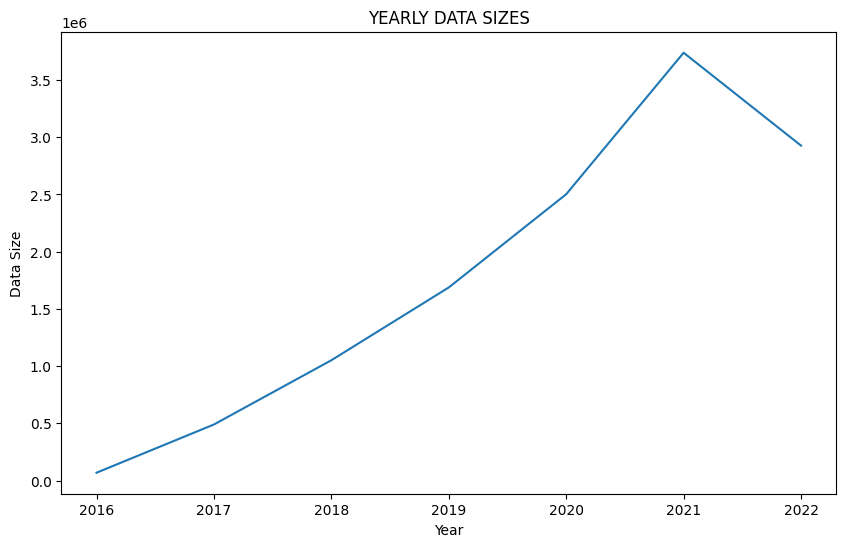

In [58]:
plt.figure(figsize=(10, 6))
plt.plot([2016, 2017, 2018, 2019, 2020, 2021, 2022], data_count)
plt.xlabel('Year')
plt.ylabel('Data Size')
plt.title(f'YEARLY DATA SIZES')
plt.show

In [68]:
customer.first_join_date = pd.to_datetime(customer.first_join_date)

join_2016 = customer[customer.first_join_date.dt.year == 2016]
join_2017 = customer[customer.first_join_date.dt.year == 2017]
join_2018 = customer[customer.first_join_date.dt.year == 2018]
join_2019 = customer[customer.first_join_date.dt.year == 2019]
join_2020 = customer[customer.first_join_date.dt.year == 2020]
join_2021 = customer[customer.first_join_date.dt.year == 2021]
join_2022 = customer[customer.first_join_date.dt.year == 2022]

join_count = pd.DataFrame([len(join_2016), len(join_2017), len(join_2018), len(join_2019), len(join_2020), len(join_2021), len(join_2022)])

<function matplotlib.pyplot.show(close=None, block=None)>

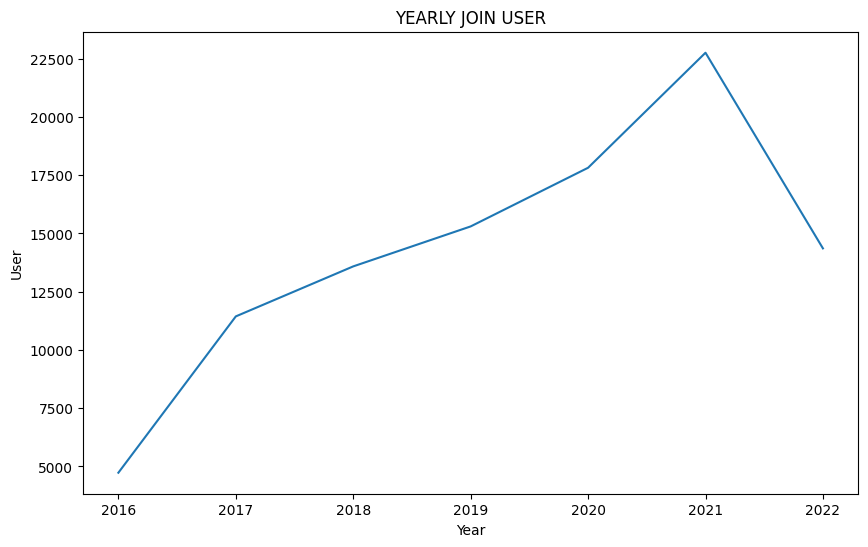

In [71]:
plt.figure(figsize=(10, 6))
plt.plot([2016, 2017, 2018, 2019, 2020, 2021, 2022], join_count)
plt.xlabel('Year')
plt.ylabel('User')
plt.title(f'YEARLY JOIN USER')
plt.show

In [86]:
def monthly_join_user(df):
    year = []
    for i in range(1,13):
        year.append(len(df[df.first_join_date.dt.month == i]))
    return year

def plot_monthly_graph(df):
    plt.figure(figsize=(10, 6))
    plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], df)
    plt.xticks(12)
    plt.xlabel('Month')
    plt.ylabel('User')
    plt.title(f'MONTHLY JOIN USER')
    return plt.show

ValueError: 'locs' must be 1D with shape (M,). Your input has shape ().

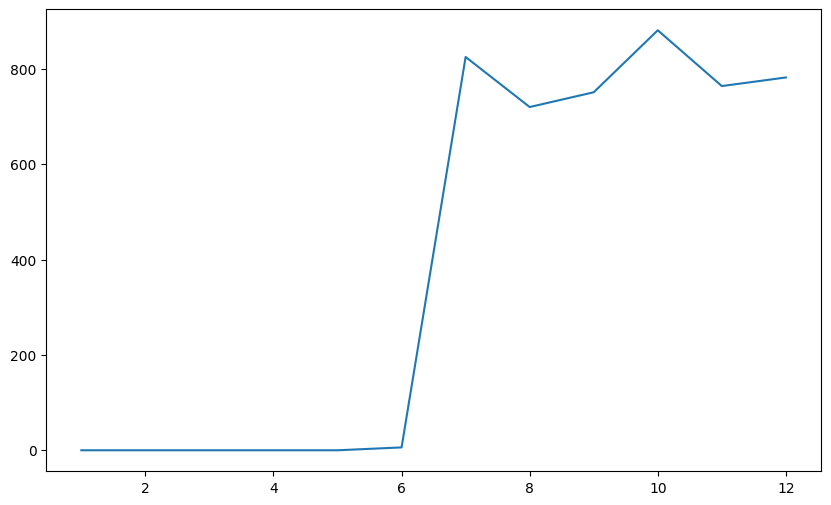

In [87]:
plot_monthly_graph(monthly_join_user(join_2016))
plot_monthly_graph(monthly_join_user(join_2017))
plot_monthly_graph(monthly_join_user(join_2018))
plot_monthly_graph(monthly_join_user(join_2019))
plot_monthly_graph(monthly_join_user(join_2020))
plot_monthly_graph(monthly_join_user(join_2021))
plot_monthly_graph(monthly_join_user(join_2022))